# Initial

In [113]:
import pandas as pd
import src.utils.globals as GLOBALS
import matplotlib.pyplot as plt
import numpy as np
import ppscore as pps
import seaborn as sns
pd.set_option('max_columns',500)




In [121]:
def heatmap(df):
    plt.figure(500,500)
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title('PPS matrix')
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    return ax

# Read Data

## read GDP Data


In [231]:
data = pd.read_csv('data\SriLanka\API_NY.GDP.PCAP.CD_DS2_en_csv_v2_2916517.csv',encoding="utf8")
data = data.rename(columns={'value':'GDP_Value'})
data_country = data[data["Country Name"]=="Sri Lanka"]
years_names = set(data_country.columns)-set(['Country Name', 'Country Code','Unnamed: 65','Indicator Name','Indicator Code'])


## read Tsunami Data

In [232]:
import geojson
path_to_file = "data\Historical_Tsunami_Event_Locations.geojson"
with open(path_to_file, encoding="cp437") as f:
    gj = geojson.load(f)
features = gj['features'][0]

In [233]:
# Properties Tsunami
properties_tsunami = pd.DataFrame([f["properties"] for f in gj['features']])
df = data[years_names].transpose().sort_index()
df.columns = data['Country Name']

# Anzahl Tsunamis je Land
from collections import Counter
Counter([f["properties"]["COUNTRY"] for f in gj['features']])


Counter({'SYRIA': 6,
         'GREECE': 146,
         'TURKEY': 51,
         'LEBANON': 2,
         'ISRAEL': 6,
         'CHINA': 35,
         'CYPRUS': 3,
         'DEAD SEA': 1,
         'JORDAN': 2,
         'INDONESIA': 228,
         'JAPAN': 310,
         'ITALY': 111,
         'UK': 17,
         'ALBANIA': 10,
         'NORTH KOREA': 3,
         'SOUTH KOREA': 10,
         'VENEZUELA': 25,
         'PORTUGAL': 28,
         'HONDURAS': 6,
         'CHILE': 157,
         'PERU': 63,
         'PHILIPPINES': 88,
         'EAST CHINA SEA': 1,
         'GERMANY': 1,
         'TAIWAN': 26,
         'CROATIA': 8,
         'JAMAICA': 9,
         'ANTIGUA AND BARBUDA': 2,
         'ICELAND': 5,
         'USA': 168,
         'SPAIN': 12,
         'MEXICO': 62,
         'RUSSIA': 90,
         'MYANMAR (BURMA)': 3,
         'DOMINICAN REPUBLIC': 5,
         'BANGLADESH': 5,
         'NORWAY': 27,
         'MARTINIQUE (FRENCH TERRITORY)': 10,
         'PAPUA NEW GUINEA': 75,
         'HAITI':

In [114]:
# Unpivot Jahres Werte
melt_gdp = pd.melt(data,id_vars=["Country Name","Country Code","Indicator Name","Indicator Code","Unnamed: 65"])
melt_gdp = melt_gdp.rename(columns={"variable": "YEAR", "Country Name": "COUNTRY",'value':'GDP_Value'})
melt_gdp.head()



COUNTRY Country Code                Indicator Name  \
0                            Aruba          ABW  GDP per capita (current US$)   
1      Africa Eastern and Southern          AFE  GDP per capita (current US$)   
2                      Afghanistan          AFG  GDP per capita (current US$)   
3       Africa Western and Central          AFW  GDP per capita (current US$)   
4                           Angola          AGO  GDP per capita (current US$)   
...                            ...          ...                           ...   
16221                       Kosovo          XKX  GDP per capita (current US$)   
16222                  Yemen, Rep.          YEM  GDP per capita (current US$)   
16223                 South Africa          ZAF  GDP per capita (current US$)   
16224                       Zambia          ZMB  GDP per capita (current US$)   
16225                     Zimbabwe          ZWE  GDP per capita (current US$)   

       Indicator Code  Unnamed: 65  YEAR        value  
0      NY.GDP.PCAP.CD          NaN  1960          NaN  
1      NY.GDP.PCAP.CD          NaN  1960   147.450369  
2      NY.GDP.PCAP.CD          NaN  1960    59.773234  
3      NY.GDP.PCAP.CD          NaN  1960   107.963779  
4      NY.GDP.PCAP.CD          NaN  1960          NaN  
...               ...          ...   ...          ...  
16221  NY.GDP.PCAP.CD          NaN  2020  4287.200903  
16222  NY.GDP.PCAP.CD          NaN  2020          NaN  
16223  NY.GDP.PCAP.CD          NaN  2020  5090.715025  
16224  NY.GDP.PCAP.CD          NaN  2020  1050.919283  
16225  NY.GDP.PCAP.CD          NaN  2020  1128.210711  

[16226 rows x 7 columns]

In [234]:
properties_tsunami.index=properties_tsunami['COUNTRY'].apply(lambda x:x.lower())+'_'+ properties_tsunami['YEAR'].apply(lambda x:str(x))
melt_gdp.index=melt_gdp['COUNTRY'].apply(lambda x:x.lower())+'_'+ melt_gdp['YEAR'].apply(lambda x:str(x))


In [235]:
df_tsunami_properties_gdp = pd.concat([properties_tsunami,melt_gdp],axis=0,sort=False)
df_tsunami_properties_gdp

ID   YEAR  MONTH  DAY  HOUR  MINUTE  SECOND  DATE_STRING  \
syria_-2000        1.0  -2000    NaN  NaN   NaN     NaN     NaN  -2000/??/??   
greece_-1610       3.0  -1610    NaN  NaN   NaN     NaN     NaN  -1610/??/??   
syria_-1365        4.0  -1365    NaN  NaN   NaN     NaN     NaN  -1365/??/??   
turkey_-1300       5.0  -1300    NaN  NaN   NaN     NaN     NaN  -1300/??/??   
lebanon_-590       7.0   -590    NaN  NaN   NaN     NaN     NaN  -0590/??/??   
...                ...    ...    ...  ...   ...     ...     ...          ...   
kosovo_2020        NaN   2020    NaN  NaN   NaN     NaN     NaN          NaN   
yemen, rep._2020   NaN   2020    NaN  NaN   NaN     NaN     NaN          NaN   
south africa_2020  NaN   2020    NaN  NaN   NaN     NaN     NaN          NaN   
zambia_2020        NaN   2020    NaN  NaN   NaN     NaN     NaN          NaN   
zimbabwe_2020      NaN   2020    NaN  NaN   NaN     NaN     NaN          NaN   

                   LATITUDE  LONGITUDE             LOCATION_NAME  AREA  \
syria_-2000          35.683      35.80             SYRIAN COASTS  None   
greece_-1610         36.400      25.40  THERA ISLAND (SANTORINI)  None   
syria_-1365          35.683      35.80             SYRIAN COASTS  None   
turkey_-1300         39.960      26.24      IONIAN COASTS, TROAD  None   
lebanon_-590         33.270      35.22            LEBANON COASTS  None   
...                     ...        ...                       ...   ...   
kosovo_2020             NaN        NaN                       NaN   NaN   
yemen, rep._2020        NaN        NaN                       NaN   NaN   
south africa_2020       NaN        NaN                       NaN   NaN   
zambia_2020             NaN        NaN                       NaN   NaN   
zimbabwe_2020           NaN        NaN                       NaN   NaN   

                        COUNTRY  REGION_CODE             REGION  CAUSE_CODE  \
syria_-2000               SYRIA         50.0  Mediterranean Sea         1.0   
greece_-1610             GREECE         50.0  Mediterranean Sea         6.0   
syria_-1365               SYRIA         50.0  Mediterranean Sea         1.0   
turkey_-1300             TURKEY         50.0  Mediterranean Sea         0.0   
lebanon_-590            LEBANON         50.0  Mediterranean Sea         1.0   
...                         ...          ...                ...         ...   
kosovo_2020              Kosovo          NaN                NaN         NaN   
yemen, rep._2020    Yemen, Rep.          NaN                NaN         NaN   
south africa_2020  South Africa          NaN                NaN         NaN   
zambia_2020              Zambia          NaN                NaN         NaN   
zimbabwe_2020          Zimbabwe          NaN                NaN         NaN   

                        CAUSE  EVENT_VALIDITY_CODE         EVENT_VALIDITY  \
syria_-2000        Earthquake                  1.0  Very Doubtful Tsunami   
greece_-1610          Volcano                  4.0       Definite Tsunami   
syria_-1365        Earthquake                  1.0  Very Doubtful Tsunami   
turkey_-1300          Unknown                  2.0   Questionable Tsunami   
lebanon_-590       Earthquake                  2.0   Questionable Tsunami   
...                       ...                  ...                    ...   
kosovo_2020               NaN                  NaN                    NaN   
yemen, rep._2020          NaN                  NaN                    NaN   
south africa_2020         NaN                  NaN                    NaN   
zambia_2020               NaN                  NaN                    NaN   
zimbabwe_2020             NaN                  NaN                    NaN   

                   EQ_MAG_UNK  EQ_MAG_MB  EQ_MAG_MS  EQ_MAG_MW  EQ_MAG_ML  \
syria_-2000               NaN        NaN        NaN        NaN        NaN   
greece_-1610              NaN        NaN        NaN        NaN        NaN   
syria_-1365               NaN        NaN        NaN        NaN   

# Analyse

## Analyse GDP

In [88]:

gdp =data_country[years_names]
values = gdp.transpose().sort_index()

### Plot GDP 

In [4]:
plt.figure(figsize=(20, 10), dpi=80)
plt.plot(values)
plt.xticks(rotation = 45) 
plt.grid(True)
plt.show()

NameError: name 'values' is not defined

<Figure size 1600x800 with 0 Axes>

### PPScore

In [9]:
df = data[years_names].transpose().sort_index()
df.columns = data['Country Name']
df


Country Name         Aruba  Africa Eastern and Southern  Afghanistan  \
1960                   NaN                   147.450369    59.773234   
1961                   NaN                   146.853701    59.860900   
1962                   NaN                   156.017929    58.458009   
1963                   NaN                   182.044085    78.706429   
1964                   NaN                   162.169577    82.095307   
...                    ...                          ...          ...   
2016          28452.170615                  1401.281053   509.220100   
2017          29350.805019                  1536.206783   519.888913   
2018          30253.279358                  1530.161917   493.756581   
2019                   NaN                  1481.425292   507.103392   
2020                   NaN                  1326.663658   508.808409   

Country Name  Africa Western and Central       Angola      Albania  \
1960                          107.963779          NaN          NaN   
1961                          113.114697          NaN          NaN   
1962                          118.865837          NaN          NaN   
1963                          123.478967          NaN          NaN   
1964                          131.892939          NaN          NaN   
...                                  ...          ...          ...   
2016                         1666.422406  3506.073128  4124.055726   
2017                         1606.978332  4095.810057  4531.020806   
2018                         1695.959215  3289.643995  5284.380184   
2019                         1772.339155  2809.626088  5355.847795   
2020                         1714.426800  1895.770869  5215.276752   

Country Name       Andorra   Arab World  United Arab Emirates     Argentina  \
1960                   NaN          NaN                   NaN           NaN   
1961                   NaN          NaN                   NaN           NaN   
1962                   NaN          NaN                   NaN   1155.890717   
1963                   NaN          NaN                   NaN    850.304579   
1964                   NaN          NaN                   NaN   1173.238105   
...                    ...          ...                   ...           ...   
2016          37475.635059  6093.331009          38141.867131  12790.242473   
2017          38964.904478  6095.663430          40644.791190  14613.041825   
2018          41791.969837  6568.984052          43839.324487  11633.498009   
2019          40897.330873  6570.174197          43103.336293   9912.281809   
2020                   NaN  5802.104129                   NaN   8441.919439   

Country Name      Armenia  American Samoa  Antigua and Barbuda     Australia  \
1960                  NaN             NaN                  NaN   1807.785710   
1961                  NaN             NaN                  NaN   1874.732106   
1962                  NaN             NaN                  NaN   1851.841851   
1963                  NaN             NaN                  NaN   1964.150470   
1964                  NaN             NaN                  NaN   2128.068355   
...                   ...             ...                  ...           ...   
2016          3591.828052    12038.249699         15198.742966  49971.131456   
2017          3914.527854    11003.829764         15383.576398  54027.966818   
2018          4220.540321    11557.671156         16673.436903  57354.964046   
2019          4622.738182    11534.567544         17113.349771  55057.204696   
2020          4267.452119             NaN         14449.996520  51812.154037   

Country Name       Austria   Azerbaijan     Burundi       Belgium  \
1960            935.460427          NaN   70.051910   1273.691659   
1961           1031.815004          NaN   71.167188   1350.197673   
1962           1087.834243          NaN   73.435331   1438.523233   
1963           1167.000532          NaN   78.514621   1535.023729   
1964           1269.412583          NaN

In [ ]:
plt.figure(figsize=(100,100))
sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## Analyse Properties Tsunami & GDP

In [236]:
# PPScore
matrix = pps.matrix(df_tsunami_properties_gdp)

C:\Users\Robert\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Robert\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Robert\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Robert\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)

<AxesSubplot:>

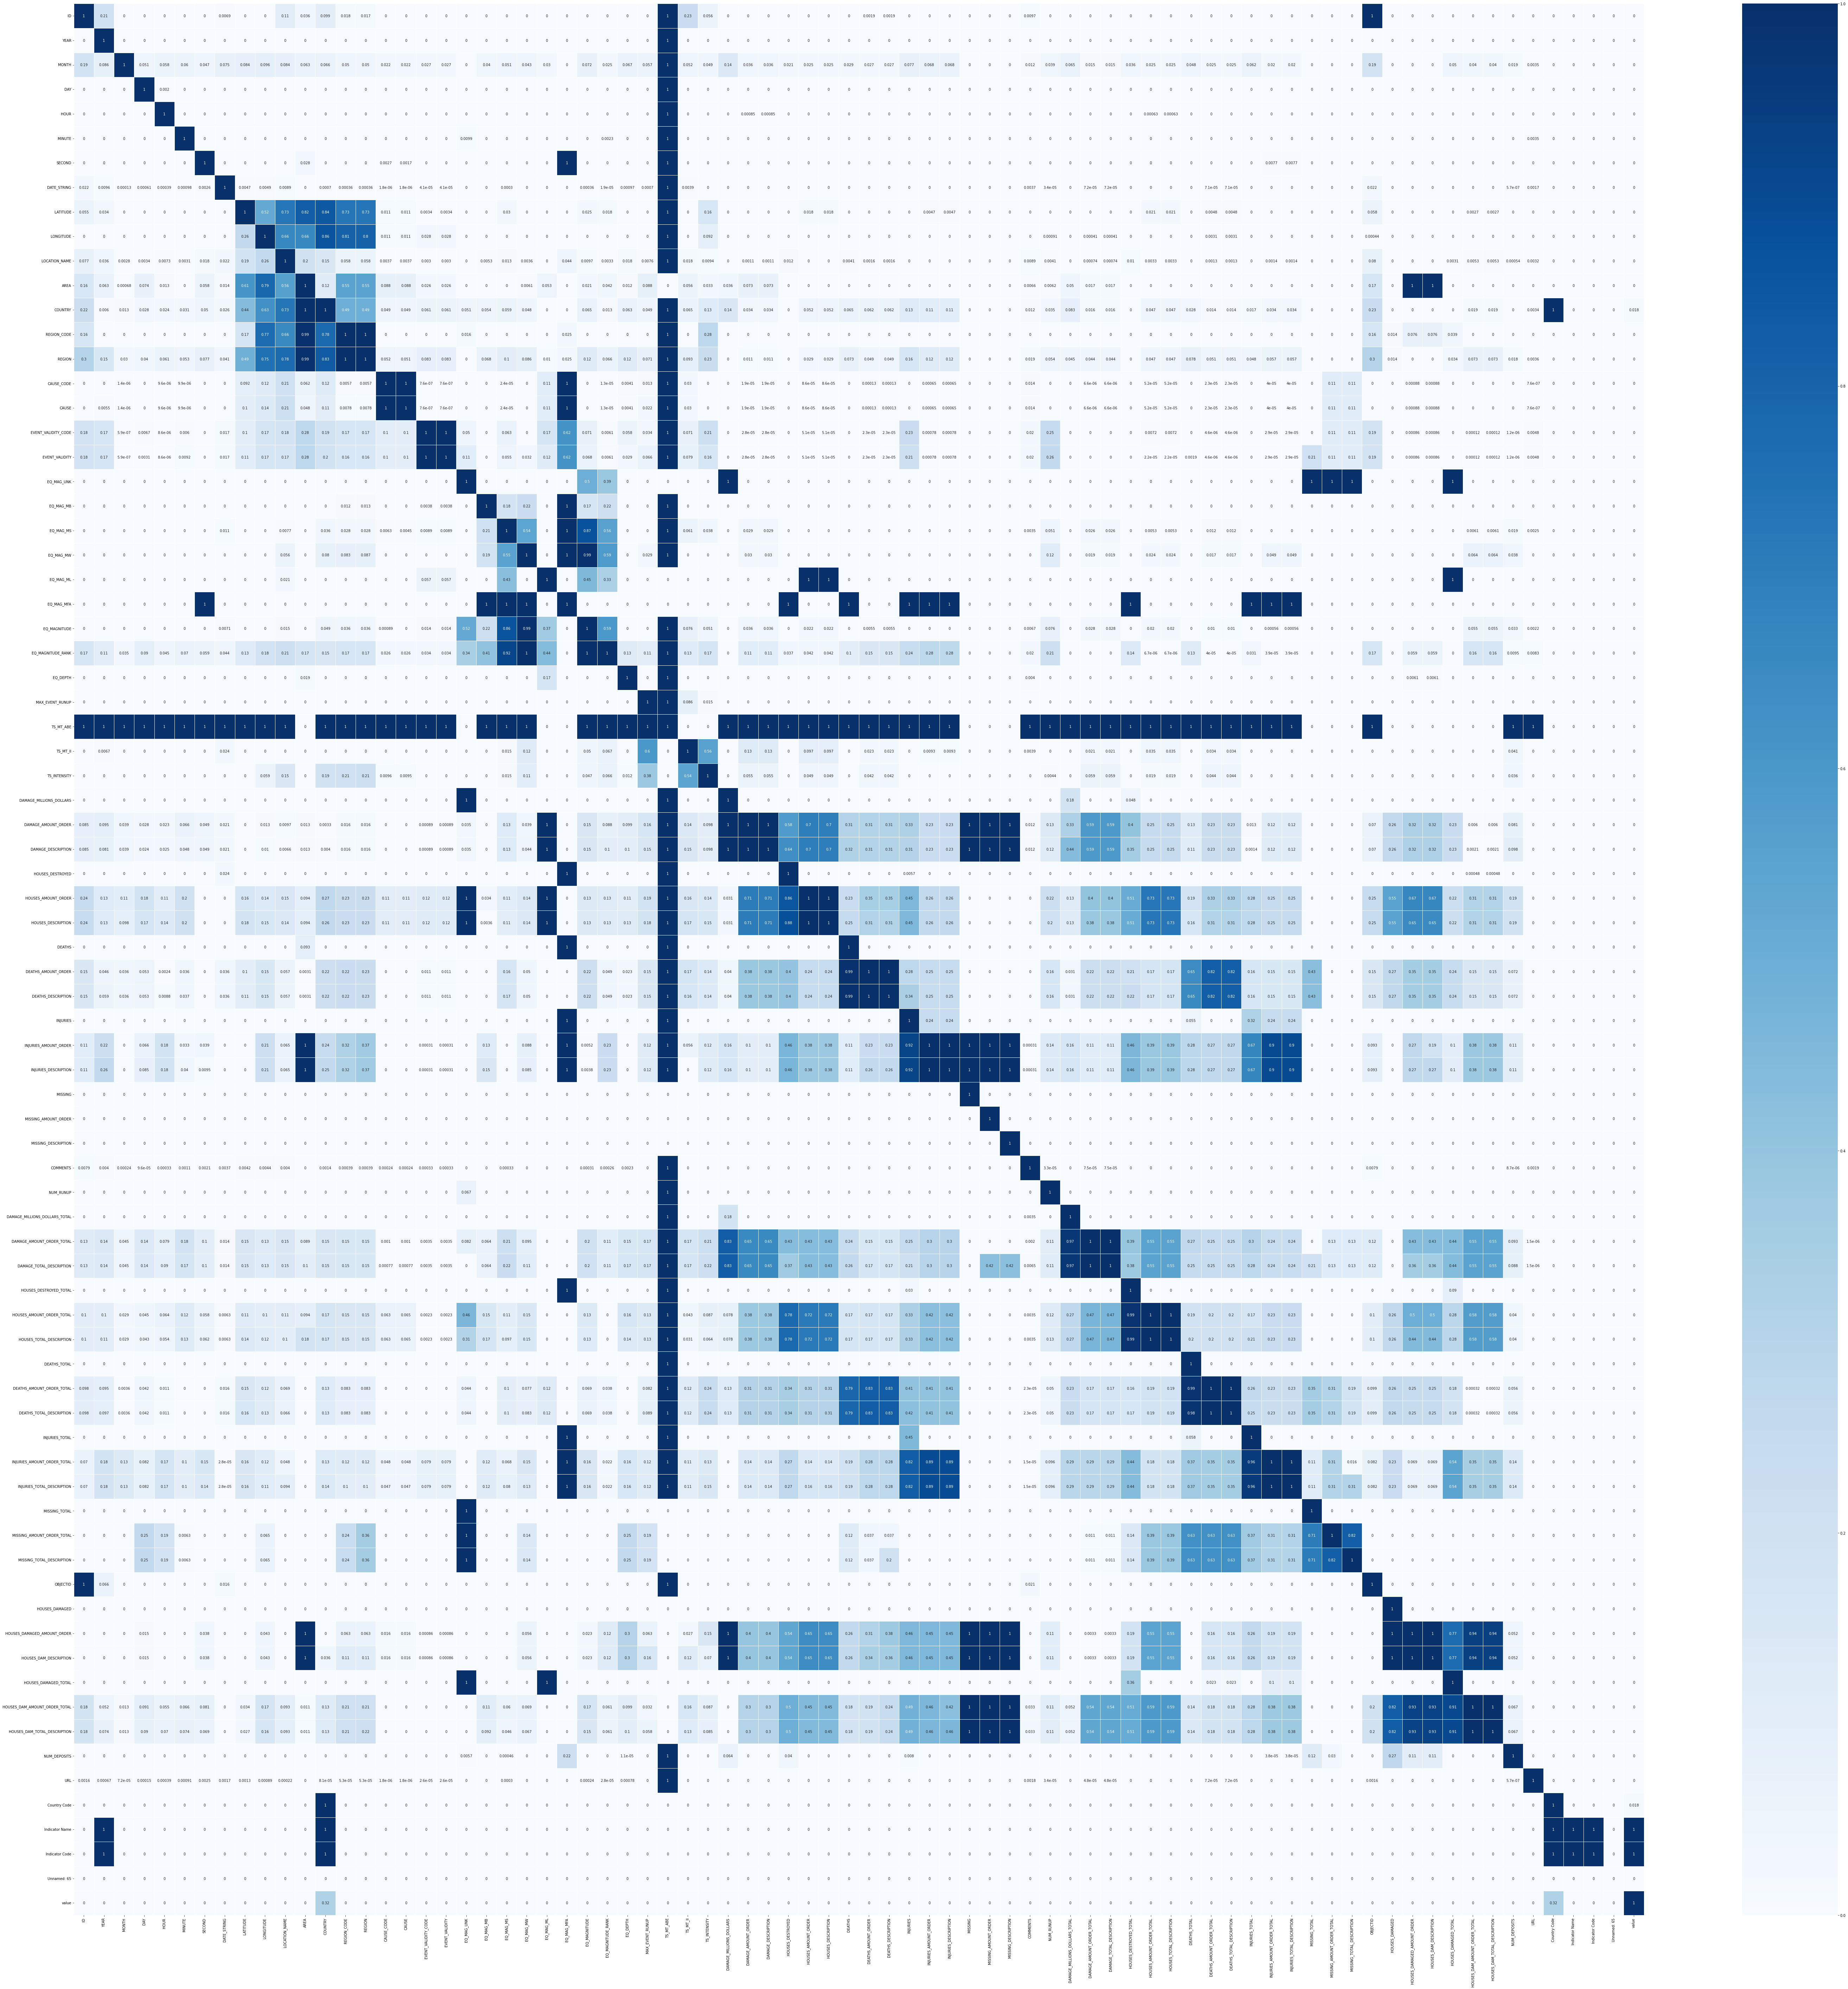

In [237]:
# Plot PPScore
plt.figure(figsize=(100,100))
sns.heatmap(matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

<AxesSubplot:>

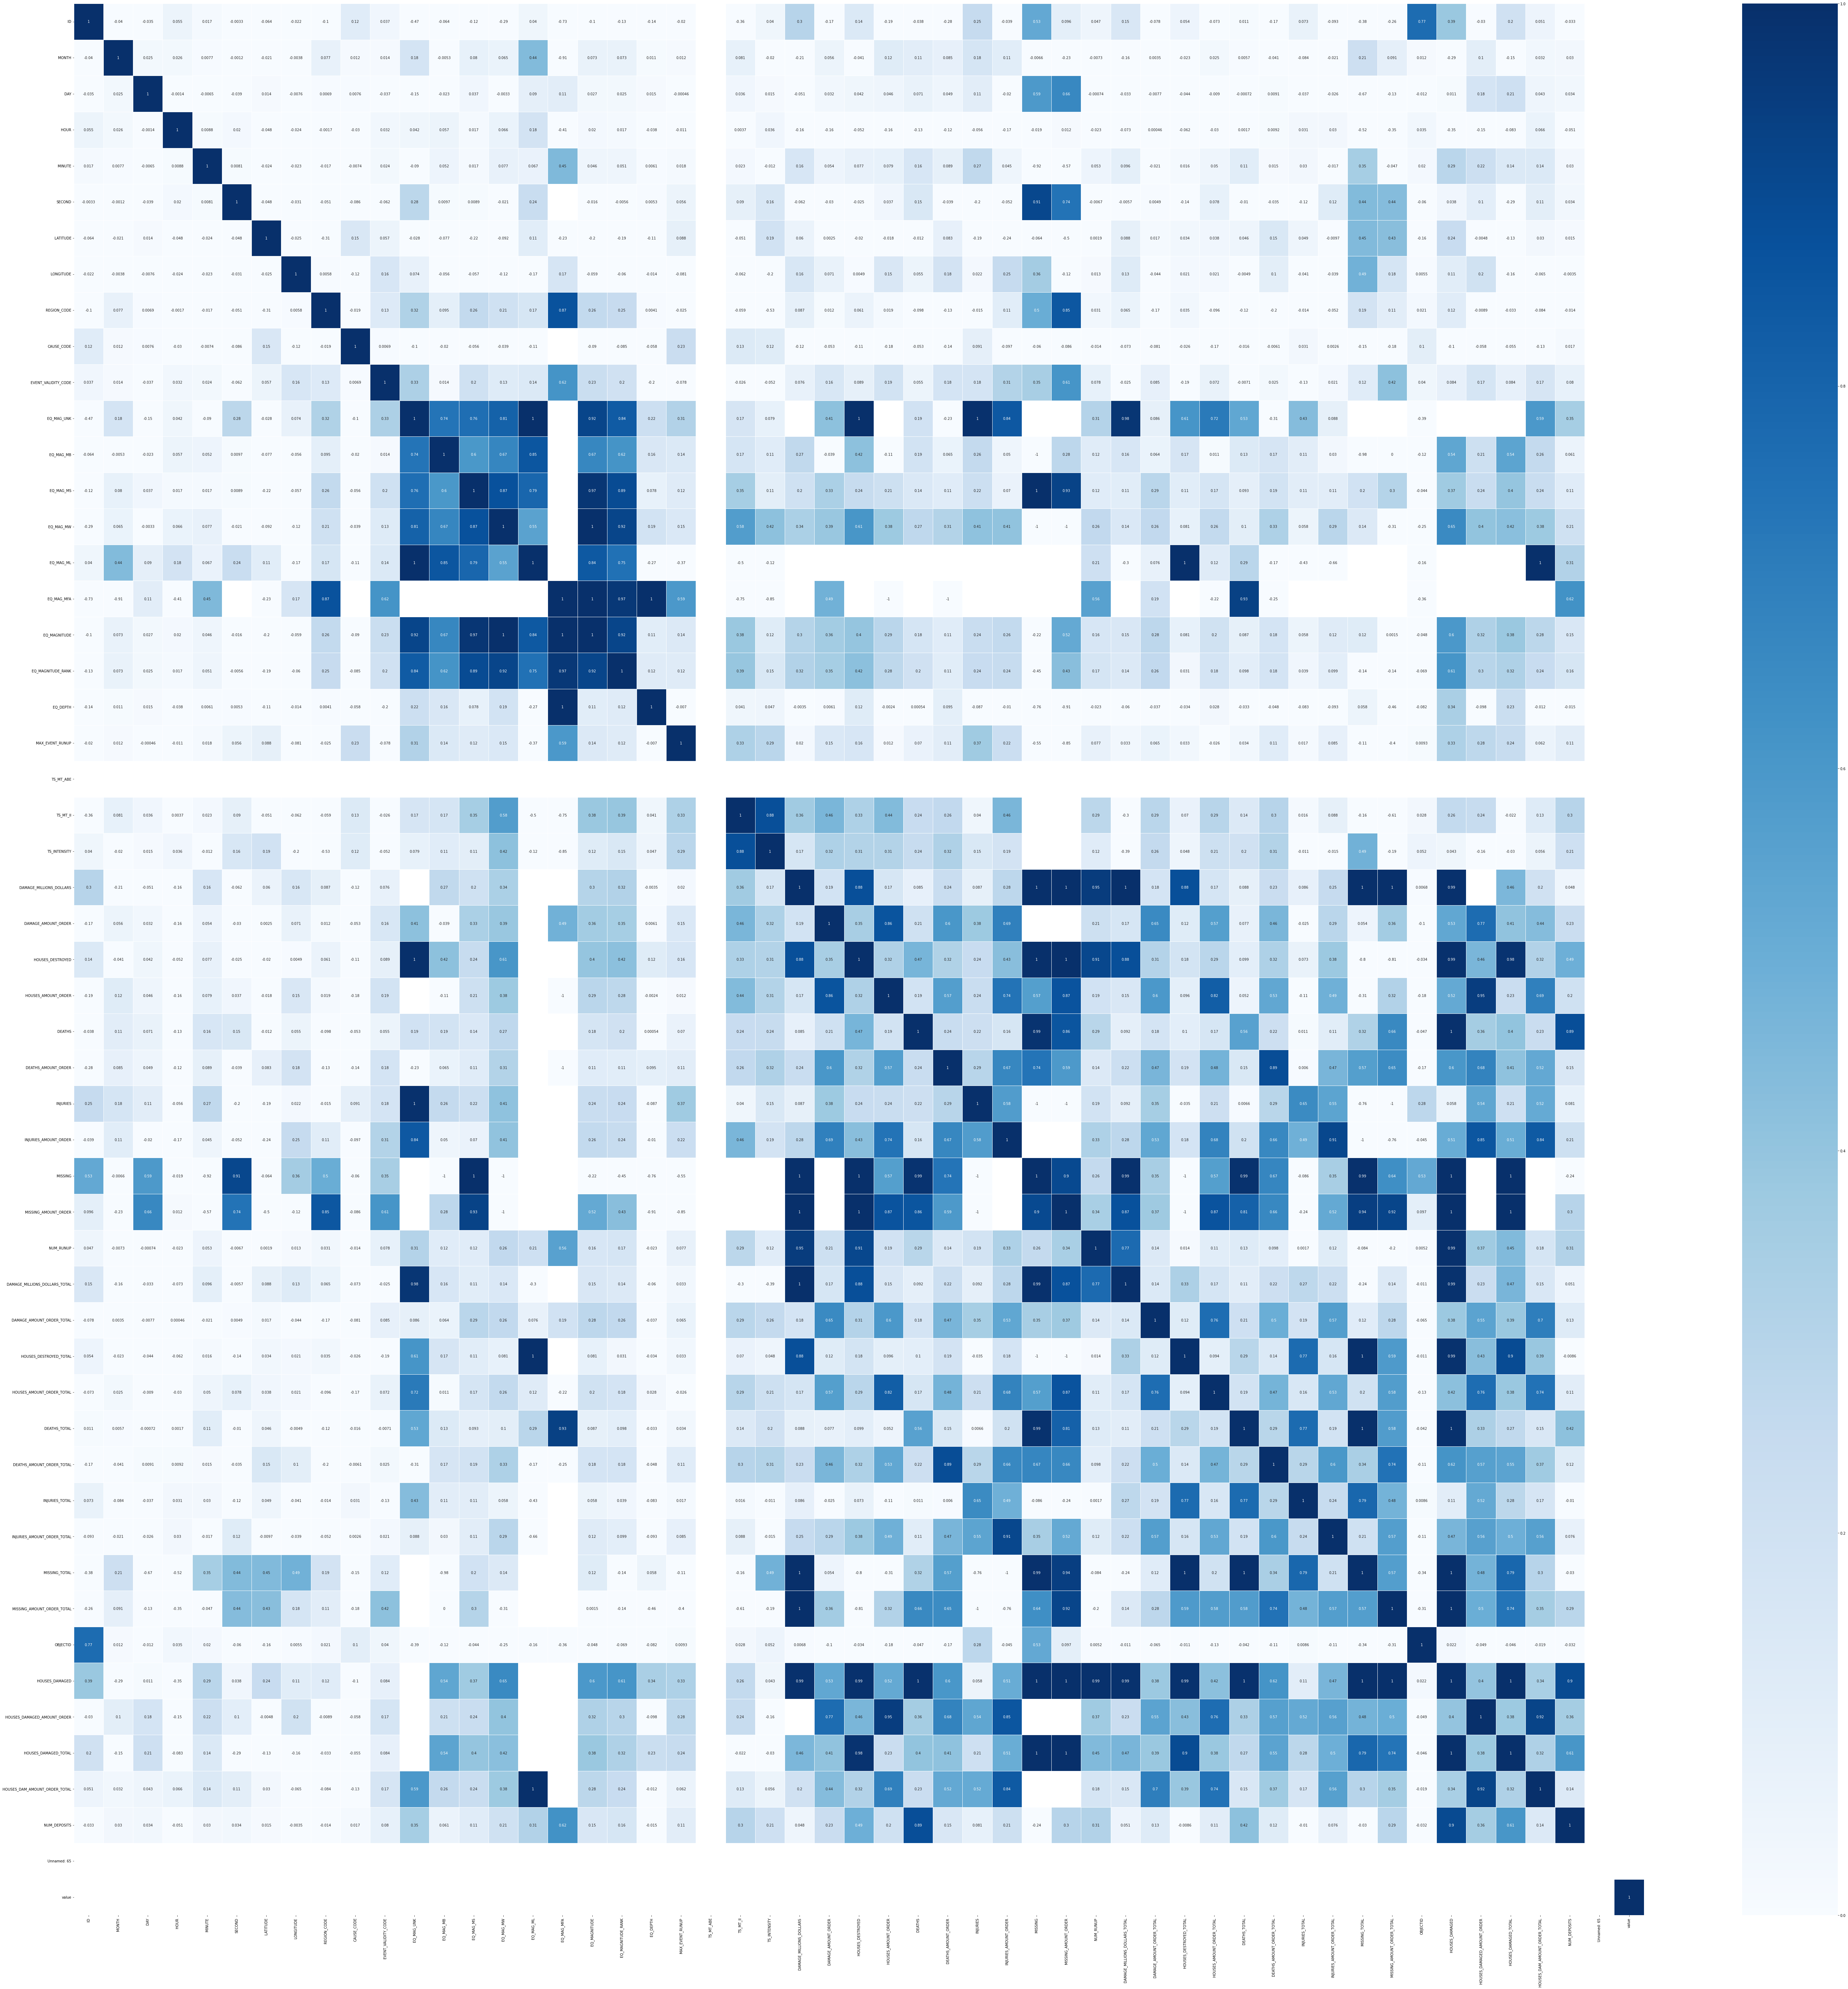

In [226]:
# Calculate and Plot Correlation
nums = list(df_tsunami_properties_gdp.dtypes[(df_tsunami_properties_gdp.dtypes=='int64')|(df_tsunami_properties_gdp.dtypes=='float64')].index)
corr = df_tsunami_properties_gdp[nums].corr()
plt.figure(figsize=(100,100))
sns.heatmap(corr, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## Missing Data

In [166]:
df_tsunami_properties_gdp = df_tsunami_properties_gdp.drop_duplicates()

In [169]:
df_tsunami_properties_gdp["YEAR['YEAR', 'COUNTRY']"]

YEAR['YEAR', 'COUNTRY'] YEAR['YEAR', 'COUNTRY']
0                      -2000                    1960
1                      -1610                    1960
2                      -1365                    1960
3                      -1300                    1960
4                       -590                    1960
...                      ...                     ...
2313                    1994                    1968
2314                    2006                    1968
2315                    2021                    1968
2316                    1984                    1968
2317                    1986                    1968

[2318 rows x 2 columns]